## This file does some initial data exploration

In [1]:
# Will delete everything in memory- be cautious
#%reset

In [2]:
import pandas as pd
import numpy as np
import datetime
import os
import re
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dir = '../data/'

In [4]:
pl_12_14_dir = data_dir + 'PL 12,14'
pl_17_18_dir = data_dir + 'PL 17,18'
pl_19_24_dir = data_dir + 'PL 19,24'
pl_21_23_dir = data_dir + 'Pl 21,23'

In [5]:
pl_12_14_4 = pd.read_csv(pl_12_14_dir + '/PL12(4).csv')

In [6]:
# get the list of files in the directory
onlyfiles = [f for f in listdir(pl_12_14_dir) if isfile(join(pl_12_14_dir, f))]

In [7]:
# Empty dictionary to hold all the dataframe for various files
dict_pl12 = {}
for i in range(len(onlyfiles)):
    if 'PL12' in onlyfiles[i]:
        # Extract the filenumber from the name
        file_number = re.search('PL12\((.+?)\).csv', onlyfiles[i]).group(1)
        # Give a value of dataframe to each key
        dict_pl12[int(file_number)] = pd.read_csv(pl_12_14_dir + "/" + onlyfiles[i])

In [8]:
dict_pl12_ordered = {}
# Sort the dictionary based on keys
for key in sorted(dict_pl12.keys()):
    dict_pl12_ordered[key] = dict_pl12[key]

In [9]:
len(dict_pl12_ordered.keys())

17

In [10]:
wanted_keys = np.arange(4, len(dict_pl12_ordered.keys())+1)

In [11]:
wanted_keys

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [12]:
# Remove the first three dataframes for characterization
dict_pl12_ord_cycling_data = {k : dict_pl12_ordered[k] for k in wanted_keys}

In [13]:
# Concatenate the dataframes to create the total dataframe
#df_pl12 = pd.concat(dict_pl12_ord_cycling_data.values())
df_pl12 = None
for k in wanted_keys:
    if df_pl12 is None:
        df_next = dict_pl12_ord_cycling_data[k]
        df_pl12 = pd.DataFrame(data=None, columns=df_next.columns)
        # df_next['Cycle'] = df_next['Cycle'] + max(df_pl12['Cycle'])
        df_pl12 = pd.concat([df_pl12, df_next])
    else:
        df_next = dict_pl12_ord_cycling_data[k]
        df_next['Cycle'] = df_next['Cycle'] + max(df_pl12['Cycle'])
        df_next['Time_sec'] = df_next['Time_sec'] + max(df_pl12['Time_sec'])
        df_next['Charge_Ah'] = df_next['Charge_Ah'] + max(df_pl12['Charge_Ah'])
        df_next['Discharge_Ah'] = df_next['Discharge_Ah'] + max(df_pl12['Discharge_Ah'])
        df_pl12 = pd.concat([df_pl12, df_next])
        

In [14]:
max(df_pl12['Cycle'])

1017

In [15]:
df_pl12.head()

,Time_sec,Date_Time,Step,Cycle,Current_Amp,Voltage_Volt,Charge_Ah,Discharge_Ah
0,10.000357,735819.421979,1,1,0.0,4.190699,0.0,0.0
1,20.000433,735819.422095,1,1,0.0,4.190699,0.0,0.0
2,30.016045,735819.422211,1,1,0.0,4.190861,0.0,0.0
3,40.031507,735819.422326,1,1,0.0,4.190537,0.0,0.0
4,50.047247,735819.422454,1,1,0.0,4.190861,0.0,0.0


In [16]:
# Reset the index and drop the old index
df_pl12_indexed = df_pl12.reset_index(drop=True)

In [17]:
# Convert the Date_Time from matlab datenum to human readable Date_Time
df_pl12['Date_Time_new'] = df_pl12['Date_Time'].apply(lambda x: datetime.datetime.fromordinal(int(x)) + datetime.timedelta(days=x%1) - datetime.timedelta(days = 366)  )

In [18]:
df_pl12.head()

,Time_sec,Date_Time,Step,Cycle,Current_Amp,Voltage_Volt,Charge_Ah,Discharge_Ah,Date_Time_new
0,10.000357,735819.421979,1,1,0.0,4.190699,0.0,0.0,2014-08-08 10:07:39.000032
1,20.000433,735819.422095,1,1,0.0,4.190699,0.0,0.0,2014-08-08 10:07:48.999967
2,30.016045,735819.422211,1,1,0.0,4.190861,0.0,0.0,2014-08-08 10:07:58.999984
3,40.031507,735819.422326,1,1,0.0,4.190537,0.0,0.0,2014-08-08 10:08:09.000020
4,50.047247,735819.422454,1,1,0.0,4.190861,0.0,0.0,2014-08-08 10:08:20.000031


In [19]:
# Reset the index and drop the old index
df_pl12_indexed = df_pl12.reset_index(drop=True)

In [20]:
df_pl12_indexed.tail()

,Time_sec,Date_Time,Step,Cycle,Current_Amp,Voltage_Volt,Charge_Ah,Discharge_Ah,Date_Time_new
1784284,1.535516e+07,736177.947546,20,1017,0.0,4.193922,1065.513122,1055.442273,2015-08-01 22:44:27.999969
1784285,1.535517e+07,736177.947662,20,1017,0.0,4.194084,1065.513122,1055.442273,2015-08-01 22:44:37.999995
1784286,1.535518e+07,736177.947778,20,1017,0.0,4.194084,1065.513122,1055.442273,2015-08-01 22:44:48.000022
1784287,1.535519e+07,736177.947894,20,1017,0.0,4.194084,1065.513122,1055.442273,2015-08-01 22:44:57.999957
1784288,1.535520e+07,736177.947975,20,1017,0.0,4.194246,1065.513122,1055.442273,2015-08-01 22:45:05.000000


/home/chintan/anaconda3/envs/keras2/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


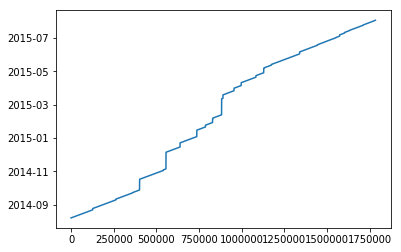

In [21]:
# Draw the plot of time column to make sure that things are arranged in the right order
plt.plot(df_pl12_indexed['Date_Time_new'])

In [22]:
df_pl12_indexed.dtypes

Time_sec                float64
Date_Time               float64
Step                     object
Cycle                    object
Current_Amp             float64
Voltage_Volt            float64
Charge_Ah               float64
Discharge_Ah            float64
Date_Time_new    datetime64[ns]
dtype: object

In [23]:
# Describe the dataframe 
df_pl12_indexed.describe()

,Time_sec,Date_Time,Current_Amp,Voltage_Volt,Charge_Ah,Discharge_Ah
count,1.784289e+06,1.784289e+06,1.784289e+06,1.784289e+06,1.784289e+06,1.784289e+06
mean,8.231456e+06,7.360089e+05,1.195501e-03,4.037383e+00,5.939680e+02,5.925625e+02
std,4.395824e+06,1.182741e+02,8.788249e-01,2.697020e-01,3.073432e+02,3.041017e+02
min,1.000036e+01,7.358194e+05,-3.001397e+00,2.748463e+00,0.000000e+00,0.000000e+00
25%,4.452792e+06,7.358946e+05,0.000000e+00,3.925225e+00,3.414219e+02,3.436435e+02
50%,8.908505e+06,7.360427e+05,2.905629e-02,4.198621e+00,6.369488e+02,6.371680e+02
75%,1.167706e+07,7.361167e+05,4.229183e-01,4.200404e+00,8.593233e+02,8.548156e+02
max,1.535520e+07,7.361779e+05,2.085116e+00,4.247663e+00,1.065513e+03,1.055442e+03


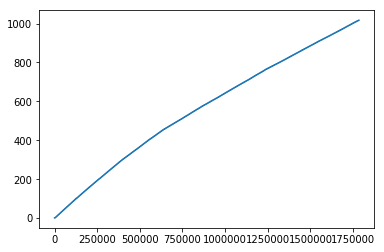

In [24]:
# Other plots to see the data
plt.plot(df_pl12_indexed['Cycle'])

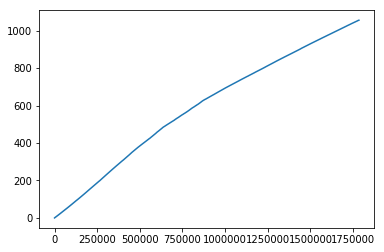

In [25]:
plt.plot(df_pl12_indexed['Discharge_Ah'])

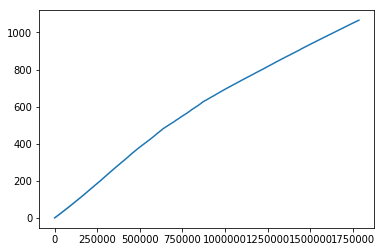

In [26]:
plt.plot(df_pl12_indexed['Charge_Ah'])

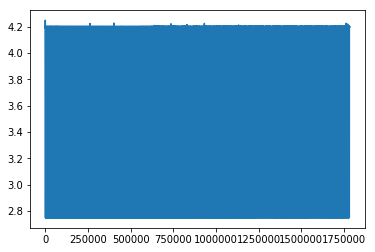

In [27]:
plt.plot(df_pl12_indexed['Voltage_Volt'])

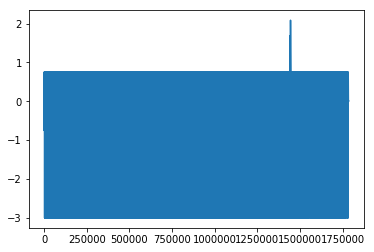

In [28]:
plt.plot(df_pl12_indexed['Current_Amp'])

In [29]:
df_sample = df_pl12_indexed.iloc[0:10000, :]

In [30]:
df_sample.head()

,Time_sec,Date_Time,Step,Cycle,Current_Amp,Voltage_Volt,Charge_Ah,Discharge_Ah,Date_Time_new
0,10.000357,735819.421979,1,1,0.0,4.190699,0.0,0.0,2014-08-08 10:07:39.000032
1,20.000433,735819.422095,1,1,0.0,4.190699,0.0,0.0,2014-08-08 10:07:48.999967
2,30.016045,735819.422211,1,1,0.0,4.190861,0.0,0.0,2014-08-08 10:07:58.999984
3,40.031507,735819.422326,1,1,0.0,4.190537,0.0,0.0,2014-08-08 10:08:09.000020
4,50.047247,735819.422454,1,1,0.0,4.190861,0.0,0.0,2014-08-08 10:08:20.000031


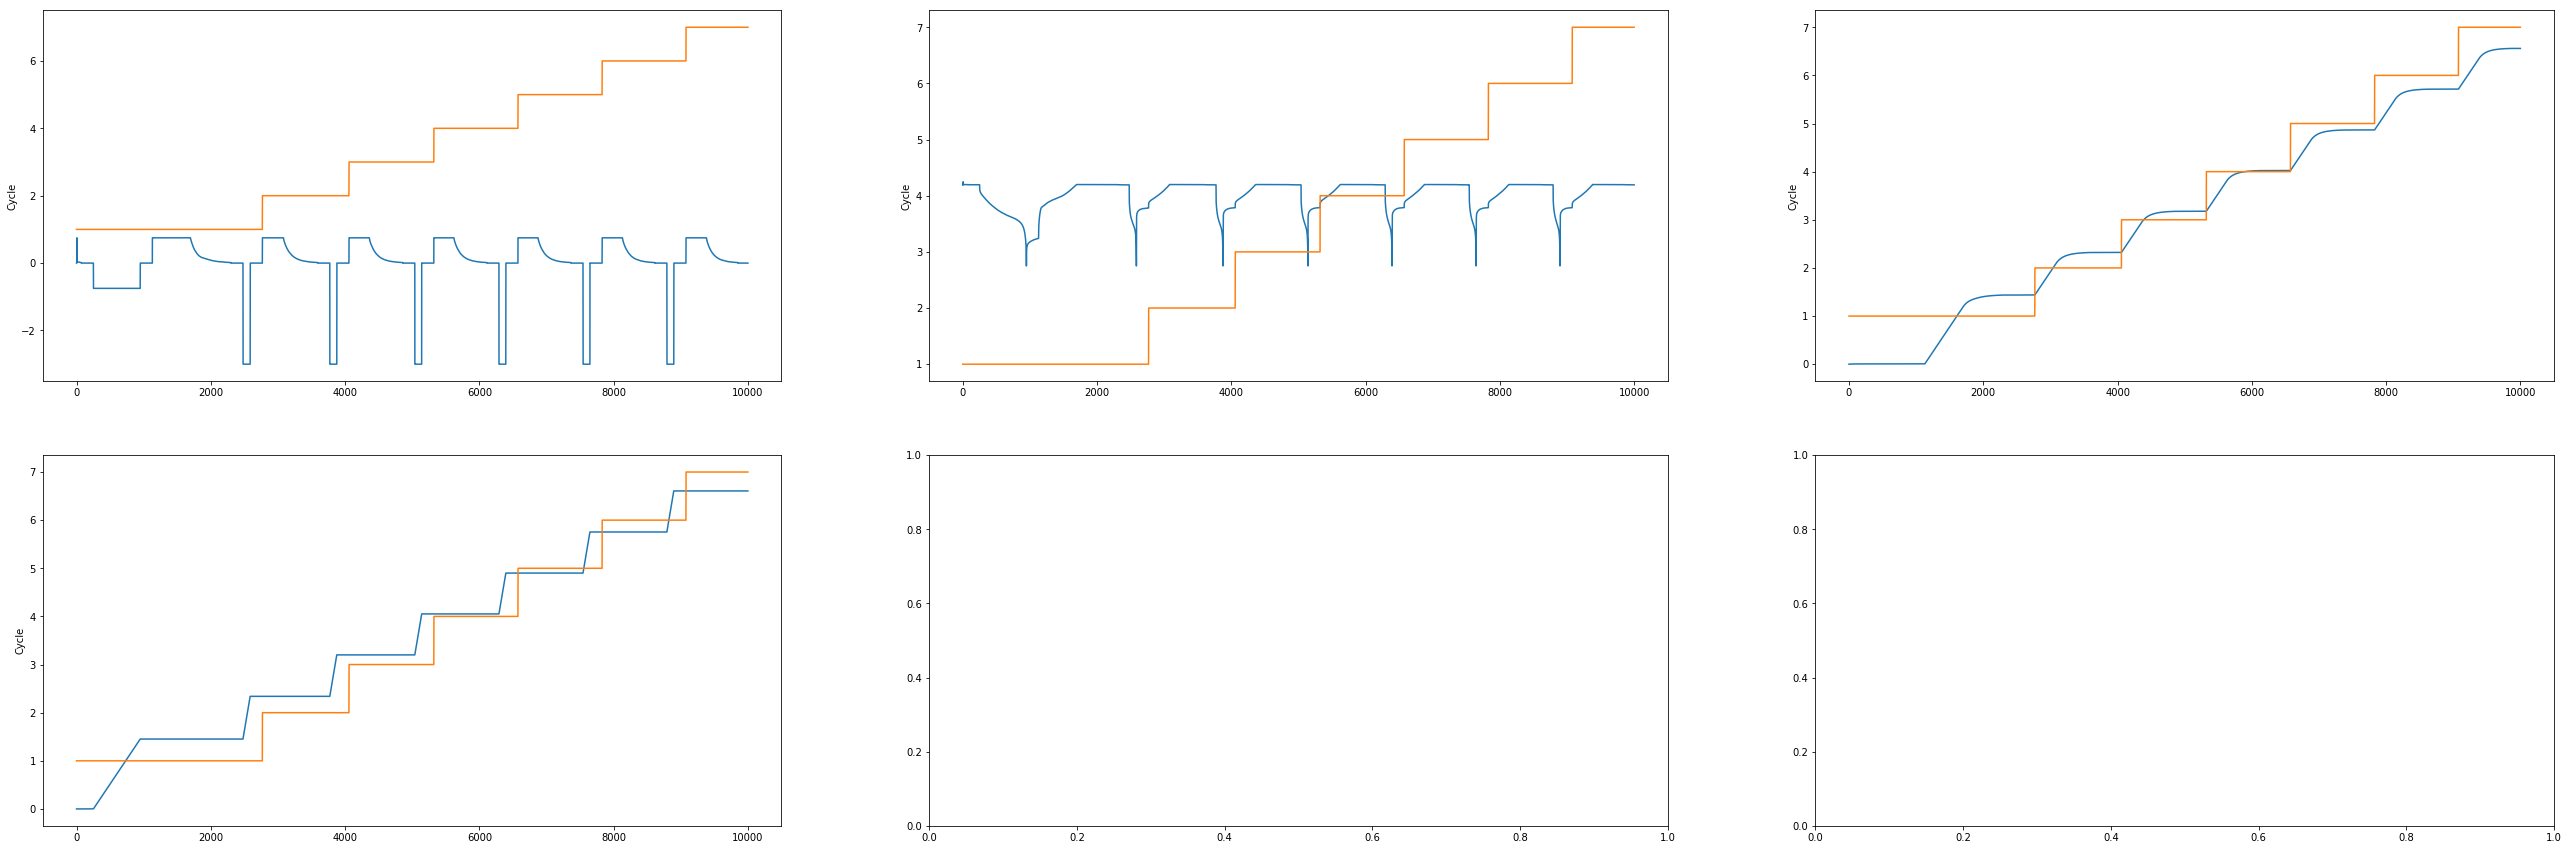

In [31]:
fig, ax = plt.subplots(2, 3, figsize = (45,15))
sns.lineplot(x = df_sample.index, y = df_sample['Current_Amp'], ax = ax[0][0])
sns.lineplot(x = df_sample.index, y = df_sample['Cycle'].astype(int), ax = ax[0][0])
#sns.scatterplot(x = idx3[0:20], y = df_sample['Current_Amp'].iloc[idx3[0:20]], ax = ax[0][0])
sns.lineplot(x = df_sample.index, y = df_sample['Voltage_Volt'], ax = ax[0][1])
sns.lineplot(x = df_sample.index, y = df_sample['Cycle'].astype(int), ax = ax[0][1])
sns.lineplot(x = df_sample.index, y = df_sample['Charge_Ah'], ax = ax[0][2])
sns.lineplot(x = df_sample.index, y = df_sample['Cycle'].astype(int), ax = ax[0][2])
sns.lineplot(x = df_sample.index, y = df_sample['Discharge_Ah'], ax = ax[1][0])
sns.lineplot(x = df_sample.index, y = df_sample['Cycle'].astype(int), ax = ax[1][0])

In [32]:
# PLot current and voltage together
sns.lineplot(x = df_sample.index, y = df_sample['Current_Amp'], ax = ax[0][0])
sns.lineplot(x = df_sample.index, y = df_sample['Cycle'].astype(int), ax = ax[0][0])
#sns.scatterplot(x = idx3[0:20], y = df_sample['Current_Amp'].iloc[idx3[0:20]], ax = ax[0][0])
sns.lineplot(x = df_sample.index, y = df_sample['Voltage_Volt'], ax = ax[0][1])

In [33]:
df_grouped = df_pl12_indexed.groupby(['Cycle']).count()

In [34]:
df_grouped.head(20)

,Time_sec,Date_Time,Step,Current_Amp,Voltage_Volt,Charge_Ah,Discharge_Ah,Date_Time_new
Cycle,,,,,,,,
1,2768,2768,2768,2768,2768,2768,2768,2768
2,1290,1290,1290,1290,1290,1290,1290,1290
3,1264,1264,1264,1264,1264,1264,1264,1264
4,1253,1253,1253,1253,1253,1253,1253,1253
5,1253,1253,1253,1253,1253,1253,1253,1253
6,1249,1249,1249,1249,1249,1249,1249,1249
7,1239,1239,1239,1239,1239,1239,1239,1239
8,1240,1240,1240,1240,1240,1240,1240,1240
9,1242,1242,1242,1242,1242,1242,1242,1242


In [35]:
cycle_start_indices = df_grouped['Time_sec'].cumsum()

In [36]:
cycle_start_indices.iloc[0]

2768

In [37]:
df_pl12_indexed['Cycle'].iloc[cycle_start_indices.iloc[45]]

47

In [38]:
df_pl12_indexed['Charge_cycle_Ah'] = df_pl12_indexed['Charge_Ah'] 
for i in range(1, len(cycle_start_indices)):
    a = cycle_start_indices.iloc[i-1]
    b = cycle_start_indices.iloc[i]
    df_pl12_indexed['Charge_cycle_Ah'].iloc[a:b] =  df_pl12_indexed['Charge_Ah'].iloc[a:b] - max(df_pl12_indexed['Charge_Ah'].iloc[0:a]) 

/home/chintan/anaconda3/envs/keras2/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [39]:
df_pl12_indexed.head()

,Time_sec,Date_Time,Step,Cycle,Current_Amp,Voltage_Volt,Charge_Ah,Discharge_Ah,Date_Time_new,Charge_cycle_Ah
0,10.000357,735819.421979,1,1,0.0,4.190699,0.0,0.0,2014-08-08 10:07:39.000032,0.0
1,20.000433,735819.422095,1,1,0.0,4.190699,0.0,0.0,2014-08-08 10:07:48.999967,0.0
2,30.016045,735819.422211,1,1,0.0,4.190861,0.0,0.0,2014-08-08 10:07:58.999984,0.0
3,40.031507,735819.422326,1,1,0.0,4.190537,0.0,0.0,2014-08-08 10:08:09.000020,0.0
4,50.047247,735819.422454,1,1,0.0,4.190861,0.0,0.0,2014-08-08 10:08:20.000031,0.0


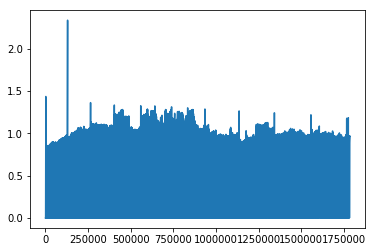

In [40]:
plt.plot(df_pl12_indexed['Charge_cycle_Ah'])

In [41]:
df_pl12_indexed['Discharge_cycle_Ah'] = df_pl12_indexed['Discharge_Ah'] 
for i in range(1, len(cycle_start_indices)):
    a = cycle_start_indices.iloc[i-1]
    b = cycle_start_indices.iloc[i]
    df_pl12_indexed['Discharge_cycle_Ah'].iloc[a:b] =  df_pl12_indexed['Discharge_Ah'].iloc[a:b] - max(df_pl12_indexed['Discharge_Ah'].iloc[0:a]) 

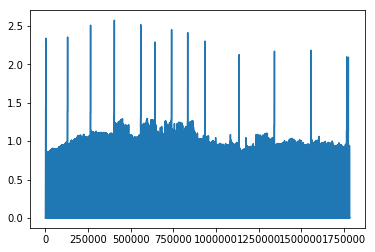

In [66]:
plt.plot(df_pl12_indexed['Discharge_cycle_Ah'])
#plt.plot(df_pl12_indexed['Cycle'].iloc[0:5000])
#plt.plot(df_pl12_indexed['Current_Amp'].iloc[0:5000])

In [43]:
# Get plots of maximum charge and discharge capacity per cycle 
max_charge_capacity_per_cycle = df_pl12_indexed.groupby(['Cycle'])['Charge_cycle_Ah'].max()
max_discharge_capacity_per_cycle = df_pl12_indexed.groupby(['Cycle'])['Discharge_cycle_Ah'].max()

In [44]:
# Get the index of these maximum charge capacity records
cycle_charge_max_index = []
for (cycle, group) in df_pl12_indexed.groupby('Cycle'):
    charge_list = np.array(group['Charge_cycle_Ah'])
    cycle_charge_max_index.append(np.argmax(charge_list))

In [45]:
# Cycle with no current 
df_101  = df_pl12_indexed.loc[df_pl12_indexed['Cycle']==101]

In [46]:
df_101.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 126664 to 126665
Data columns (total 11 columns):
Time_sec              2 non-null float64
Date_Time             2 non-null float64
Step                  2 non-null object
Cycle                 2 non-null object
Current_Amp           2 non-null float64
Voltage_Volt          2 non-null float64
Charge_Ah             2 non-null float64
Discharge_Ah          2 non-null float64
Date_Time_new         2 non-null datetime64[ns]
Charge_cycle_Ah       2 non-null float64
Discharge_cycle_Ah    2 non-null float64
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 192.0+ bytes


In [47]:
df_101['Charge_cycle_Ah'].max()

0.0

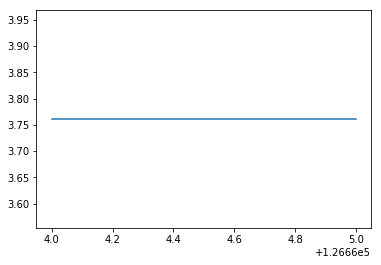

In [48]:
plt.plot(df_101['Voltage_Volt'])

In [49]:
len(cycle_charge_max_index)

1017

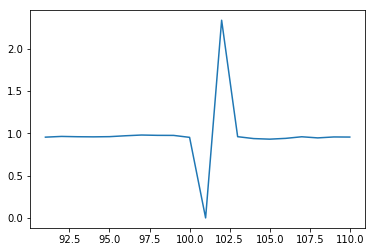

In [50]:
plt.plot(max_charge_capacity_per_cycle[90:110])
#plt.plot(max_discharge_capacity_per_cycle)

In [51]:
# Cycle with maximum capacity 
df_102  = df_pl12_indexed.loc[df_pl12_indexed['Cycle']==102]

In [52]:
df_102['Charge_cycle_Ah'].max()

2.3390229476335094

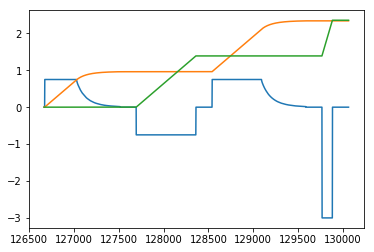

In [53]:
plt.plot(df_102['Current_Amp'])
plt.plot(df_102['Charge_cycle_Ah'])
plt.plot(df_102['Discharge_cycle_Ah'])

In [54]:
len(df_101)

2

In [55]:
min(max_charge_capacity_per_cycle)

0.0

In [56]:
# This is the data column we can use for prediction. This is not totally accurate, as this still has some points that go negative, due to incorrect discharge_Ah values every few cycles. 
# But the machine learning algorithm should consider these as outliers and hopefully get over it. We can come back and correct this. 
df_pl12_indexed['Capacity_cycle_Ah'] = df_pl12_indexed['Charge_cycle_Ah'] - df_pl12_indexed['Discharge_cycle_Ah']

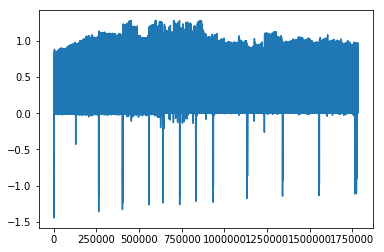

In [71]:
plt.plot(df_pl12_indexed['Capacity_cycle_Ah'])
